In [1]:
# Load all libraries 
from PIL import Image
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [2]:
# Display Result Images
def griddisplay(image_list):
    rows = int(len(image_list) / 5) 
    fig1, axes_array = plt.subplots(rows, 5)
    fig1.set_size_inches(5,5)
    k=0
    for row in range(rows):
        for col in range(5):    
            im = np.array(Image.fromarray(image_list[k]).resize((100, 100), Image.ANTIALIAS))
            axes_array[row][col].imshow(im,cmap=plt.cm.gray) 
            axes_array[row][col].axis('off')
            k = k+1
    plt.show()

In [3]:
# Load all Training Images 
train_images=[]
for i in range(0,90):
    filename = r'C:\Users\power\Desktop\cv-task5\AllData\TrainingImages\Face' +str(i) + '.jpg'
    im=Image.open(filename).convert('L')
    im= np.asarray(im,dtype=float)/255.0 
    train_images.append(im)

TrainImages_num = len(train_images)

# Load all Testing Images 
test_images=[]
for i in range(0,60):
    filename =r'C:\Users\power\Desktop\cv-task5\AllData\TestingImages\Face' +str(i) + '.jpg'
    im=Image.open(filename).convert('L')
    im= np.asarray(im,dtype=float)/255.0 
    test_images.append(im)

TestImages_num = len(test_images)

In [4]:
# Getting Mean Face and Getting Eigen faces
flattened_images  =[]
for i in range(TrainImages_num):
    p= train_images[i].flatten()
    flattened_images.append(p)

A_transpose = np.matrix(flattened_images)
A = np.transpose(A_transpose)

Mean= np.mean(A,1)
b= Mean.reshape(128,128)
resized_mean=np.array(Image.fromarray(np.asarray(b)).resize((100, 100), Image.BILINEAR))

zero_mean =[]
column =0
Zero_mean_matrix= np.ones((16384,TrainImages_num))
for values in flattened_images:
    zm= A[:,column] - Mean         # zm = values - mean
    zm = np.squeeze(zm)
    Zero_mean_matrix[:,column] =zm
    zm_images = zm.reshape(128,128)
    zero_mean.append(zm)
    column = column +1

d = (np.dot(np.transpose(Zero_mean_matrix),Zero_mean_matrix))/425
u_list =[]
w2, v2 = la.eigh(d)

for ev in v2:
    ev_transpose = np.transpose(np.matrix(ev))
    u = np.dot(Zero_mean_matrix,ev_transpose)                        
    u = u / np.linalg.norm(u)
    u_i= u.reshape(128,128)
    u_list.append(u_i)

C:\Users\power\AppData\Local\Temp\ipykernel_12236\3475385436.py:12: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  resized_mean=np.array(Image.fromarray(np.asarray(b)).resize((100, 100), Image.BILINEAR))


In [5]:
# Getting Weights
dict ={}
def Reconstruct(k):
    weights=np.zeros((TrainImages_num,k))
    matrixU = np.zeros((16384,k))
    c =0
    for val in range(k-1,-1,-1):
        matrixU[:,c] = u_list[val].flatten()
        c = c+1
    rec_face=[]
    for face_num in range(0,TrainImages_num):
        w = np.dot(np.transpose(matrixU) ,Zero_mean_matrix[:,face_num])
        weights[face_num,:] =w

        face = np.dot(w, np.transpose(matrixU))
        minf = np.min(face)
        maxf = np.max(face)
        face = face-float(minf)
        face = face/float((maxf-minf))
        face = face+np.transpose(Mean)
        reshape_face = face.reshape(128,128)
        rec_face.append( reshape_face)
    dict[k] = weights

Reconstruct(90)


		k = 90
Minimum Distance :   12.851036304534158


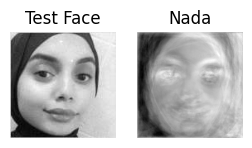

Minimum Distance :   37.8812128042474


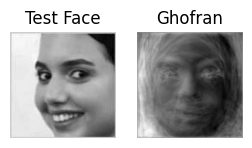

Minimum Distance :   12.345643428937729


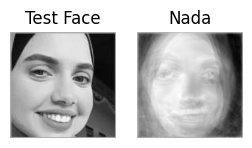

Minimum Distance :   24.115241731276555


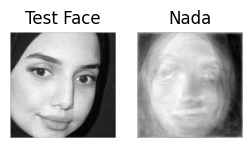

Minimum Distance :   21.83874406567735


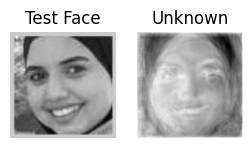

Minimum Distance :   27.922589264696384


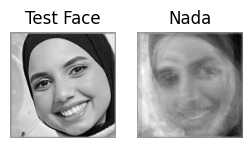

Minimum Distance :   21.75848908559974


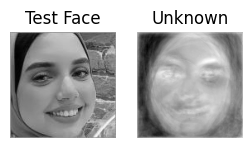

Minimum Distance :   15.638784114158598


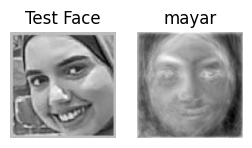

Minimum Distance :   22.292203081760267


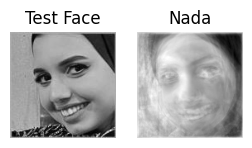

Minimum Distance :   33.042391896973186


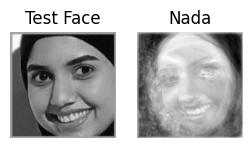

Minimum Distance :   5.8780493618662355


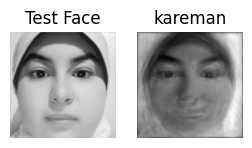

Minimum Distance :   50.718199297716524


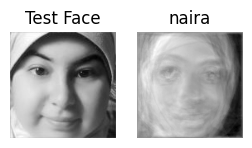

Minimum Distance :   0.0


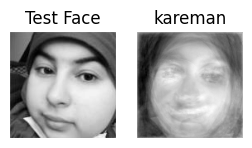

Minimum Distance :   35.187375682311135


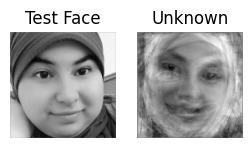

Minimum Distance :   10.07034831613079


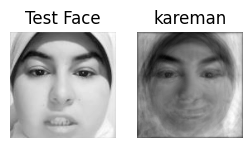

Minimum Distance :   45.98229297308689


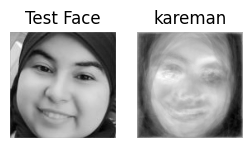

Minimum Distance :   25.045721937803012


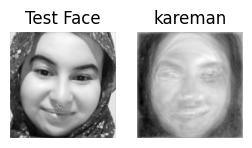

Minimum Distance :   36.682976117144364


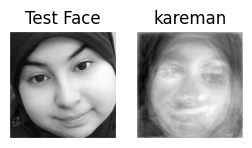

Minimum Distance :   8.889918993541224


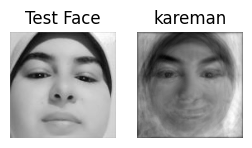

Minimum Distance :   0.0


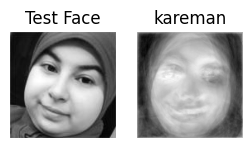

Minimum Distance :   25.04258536873608


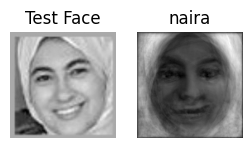

Minimum Distance :   16.198348144640722


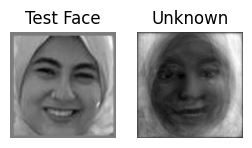

Minimum Distance :   32.73918341246242


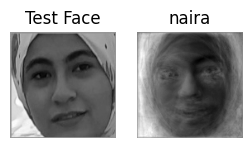

Minimum Distance :   16.814515278748416


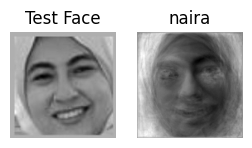

Minimum Distance :   22.82520396422356


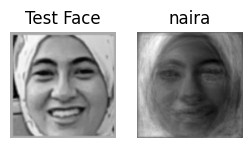

Minimum Distance :   15.627605222099964


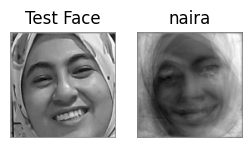

Minimum Distance :   28.29928078939578


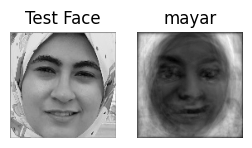

Minimum Distance :   15.030087308655313


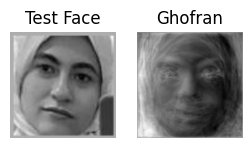

Minimum Distance :   31.884039393473184


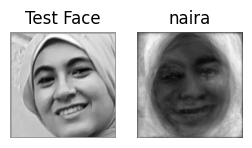

Minimum Distance :   23.991751171585683


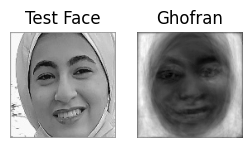

Minimum Distance :   0.0


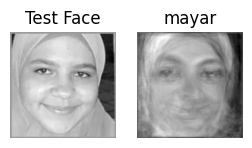

Minimum Distance :   25.471837922140878


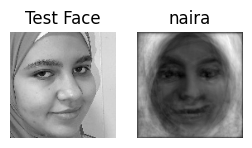

Minimum Distance :   37.13998461619158


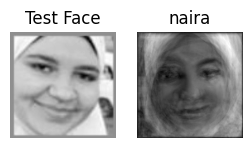

Minimum Distance :   0.0


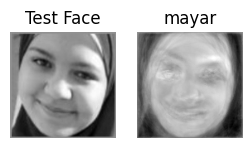

Minimum Distance :   0.0


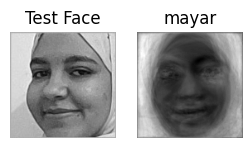

Minimum Distance :   22.66987983220276


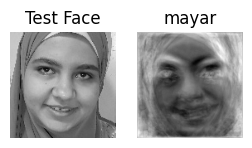

Minimum Distance :   0.0


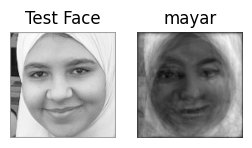

Minimum Distance :   0.0


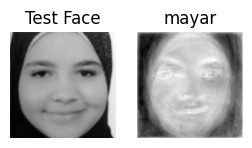

Minimum Distance :   24.281280950397466


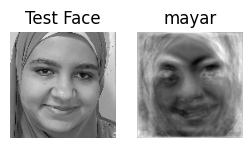

Minimum Distance :   0.0


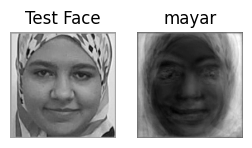

Minimum Distance :   26.287482299663168


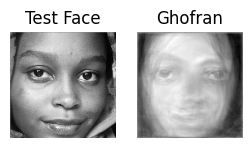

Minimum Distance :   41.297132980947325


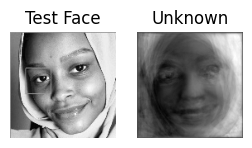

Minimum Distance :   26.459316502733927


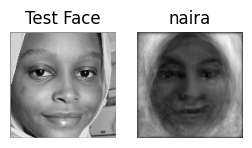

Minimum Distance :   37.9642649958467


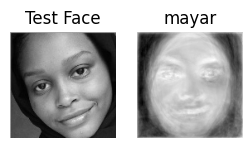

Minimum Distance :   29.249464303092143


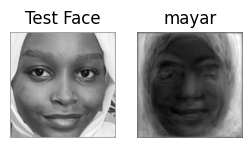

Minimum Distance :   33.007255552827985


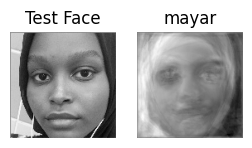

Minimum Distance :   21.853762087195356


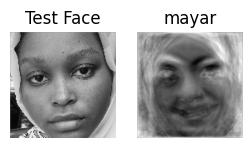

Minimum Distance :   27.670317674714784


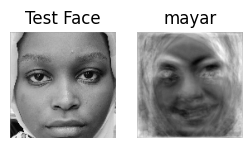

Minimum Distance :   31.102646964024526


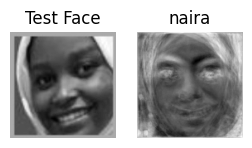

Minimum Distance :   23.880954870501228


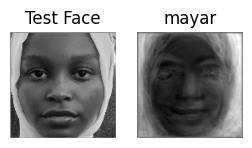

Minimum Distance :   0.0


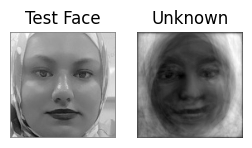

Minimum Distance :   0.0


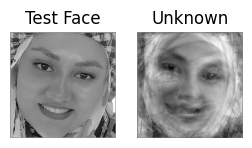

Minimum Distance :   0.0


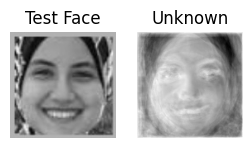

Minimum Distance :   0.0


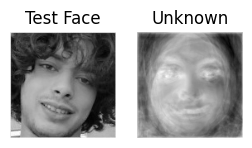

Minimum Distance :   0.0


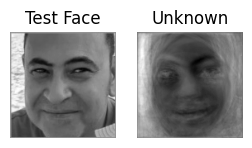

Minimum Distance :   32.82245314391995


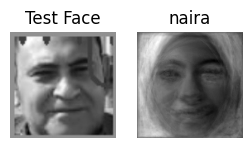

Minimum Distance :   0.0


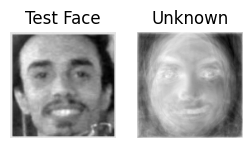

Minimum Distance :   0.0


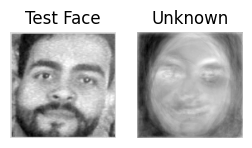

Minimum Distance :   0.0


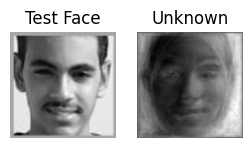

Minimum Distance :   0.0


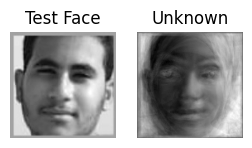

Length Of Test_Predicted :  60


In [6]:
# Testing Images
y_pred=[]

def Project(k, zero_mean_test, threshold):
    matrixU = np.zeros((16384, k))
    c = 0
    name =""
    for val in range(k-1, -1, -1):
        matrixU[:, c] = u_list[val].flatten()
        c = c + 1
    w = np.dot(np.transpose(matrixU), np.transpose(zero_mean_test))
    original_w_k = dict[k]
    dist = []
    for wt_vectors in original_w_k:
        dist.append(np.linalg.norm(wt_vectors-w.T))

    print ("Minimum Distance :  ", np.min(dist))
    nearest_face = np.argmin(dist)
    nearest_face_weights = original_w_k[nearest_face]
    zero_mean_test = zero_mean_test + np.transpose(Mean)
    face = np.dot(nearest_face_weights, np.transpose(matrixU))
    face = face + np.transpose(Mean)
    reshape_face = face.reshape(128, 128)

    if np.min(dist) < threshold:  
        index = nearest_face
        if index in range(0,15):
            name="Nada"
            y_pred.append(0)
        elif index in range(15,30):
            name="kareman"
            y_pred.append(1)
        elif index in range(30,45):
            name="naira"
            y_pred.append(2)
        elif index in range(45,60):
            name="mayar"
            y_pred.append(3)
        elif index in range(60,75):
            name="Ghofran" 
            y_pred.append(4)
        elif index in range(75,90):
            name="Unknown" 
            y_pred.append(5)
    else:
        index = -1
        name = 'Unknown'
        y_pred.append(5)
    return  name, reshape_face
    
def runs(k):
    for num in range(TestImages_num):
        t = test_images[num]
        test = t.flatten()
        zero_mean_test = test - np.transpose(Mean)
        name, face = Project(k, zero_mean_test, 80)  # threshold = 80
        fig1, axes_array = plt.subplots(1, 2)
        fig1.set_size_inches(3, 3)
        axes_array[0].imshow(t, cmap=plt.cm.gray)
        axes_array[0].axis('off')
        axes_array[0].set(title='Test Face')
        axes_array[1].imshow(face, cmap=plt.cm.gray)
        axes_array[1].axis('off')
        axes_array[1].set(title = name)
        plt.show()

print('\t\tk = 90')
runs(90)

print ("Length Of Test_Predicted : ", len(y_pred))


In [7]:
# Testing Images Labels
y_test=[0,0,0,0,0,0,0,0,0,0]       #nada
for i in range(10):
    y_test.append(1)                #kareman 
for i in range(10):
    y_test.append(2)               #naira
for i in range(10):
    y_test.append(3)                 #mayar
for i in range(10):
    y_test.append(4)                  #ghofran 
for i in range(10):
    y_test.append(5)                  #unknown

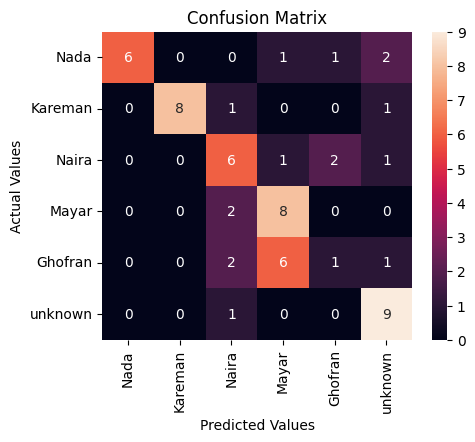

In [8]:
# Creating a confusion matrix, which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Nada','Kareman','Naira','Mayar','Ghofran','unknown'], 
                     columns = ['Nada','Kareman','Naira','Mayar','Ghofran','unknown'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Text(0.5, 1.0, 'Receiver operating characteristic for multi-class data')

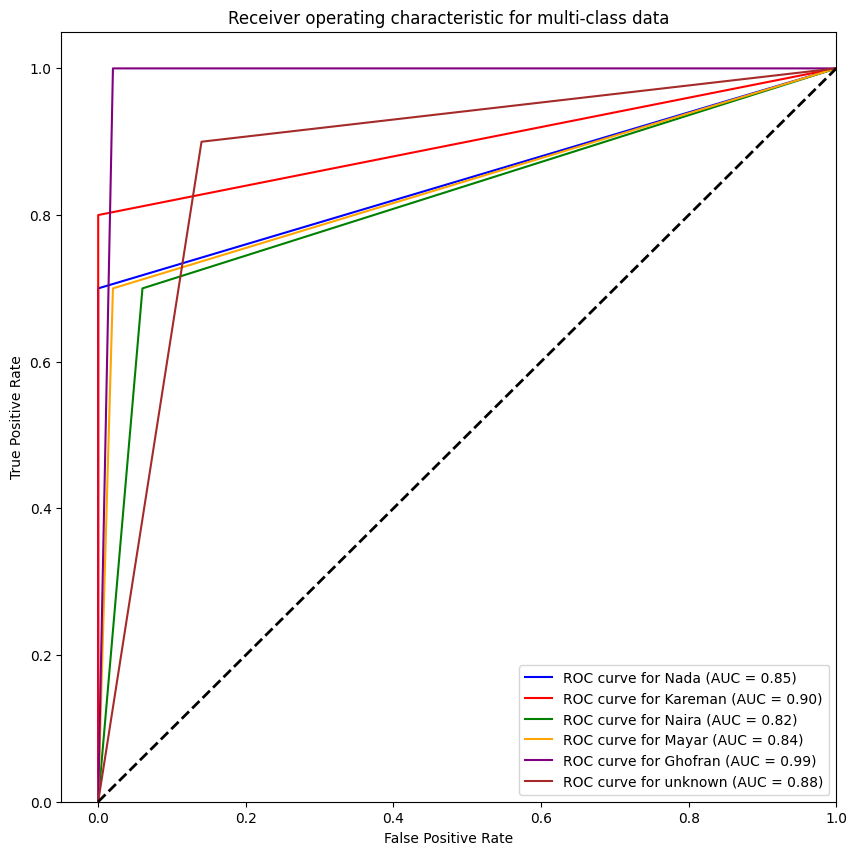

In [49]:
# Binarize the output
y_test = label_binarize(y_test, classes=[0, 1, 2,3,4,5])
y_pred = label_binarize(y_pred, classes=[0, 1, 2,3,4,5])
n_classes = y_test.shape[1]
target_names=['Nada','Kareman','Naira','Mayar','Ghofran','unknown']
fpr = {}
tpr = {}
roc_auc ={}
lw =2 
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink'])
fig, ax = plt.subplots(figsize=(10, 10))
for i, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_test[:, i],
        y_pred[:, i],
        name=f"ROC curve for {target_names[i]}",
        color=color,ax=ax
    )
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')

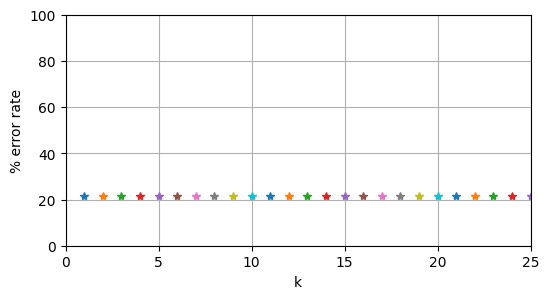

In [50]:
def Error(k,threshold):
    Nonfaces = 13
    total_images = 60
    nf_detected = 0
    matrixU = np.zeros((16384,k))
    c = 0
    
    for val in range(k-1,-1,-1):
        matrixU[:,c] = u_list[val].flatten()
        c = c+1
    
    for t in test_images:
        test = t.flatten()
        zero_mean_test = test-np.transpose(Mean)
        w = np.dot(np.transpose(matrixU) ,np.transpose(zero_mean_test))
        original_w_k =dict[k]
        dist =[]
        for wt_vectors in original_w_k:
            dist.append(np.linalg.norm(wt_vectors-w.T))
        
        if np.min(dist) > threshold:
            nf_detected = nf_detected + 1

    
    error_percentage = ((Nonfaces - nf_detected)/total_images) *100
    return error_percentage

xt =[]
for x in range(1,90):
    Reconstruct(x)
    xt.append(x)


fig, axes1 = plt.subplots(1, 1)
fig.set_size_inches(6,3)
for x_pts in xt:
    y= Error(x_pts,80)
    axes1.plot(x_pts, y,marker='*')
axes1.set(xlabel="k",ylabel="% error rate",ylim=(0,100),xlim=(0,25))
plt.grid(True)
plt.show()
